##IMPORTATION DES BIBLIOTHEQUES BASIQUES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#import plotly 
#from plotly.subplots import make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###JEU DE DONNEES MFEAT-FAC



In [ ]:
mfeat_fac= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-fac'
#data_fac= pd.read_fwf(mfeat_fac, header=None)
mfeat_fac= pd.read_table(mfeat_fac, sep = "\s+",header=None)

In [ ]:
mfeat_fac.head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13


In [ ]:
mfeat_fac.shape

(2000, 216)

In [ ]:
mfeat_fac.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
211    0
212    0
213    0
214    0
215    0
Length: 216, dtype: int64

In [ ]:
mfeat_fac.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
211    int64
212    int64
213    int64
214    int64
215    int64
Length: 216, dtype: object

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_fac,"fac")
mfeat_fac.head()

# renommerAttributs(mfeat_fou,"fou")
# renommerAttributs(mfeat_kar,"kar")
# renommerAttributs(mfeat_mor,"mor")
# renommerAttributs(mfeat_pix,"pix")
# renommerAttributs(mfeat_zer,"zer")
# mfeat_zer.head()

,fac0,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,...,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13


##**METHODE ACP** 

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_fac=scaler.fit_transform(mfeat_fac)


In [ ]:
scaled_mfeat_fac

array([[-1.90735868, -0.79274325, -1.74027935, ...,  1.17558452,
        -0.85869511, -0.09760513],
       [-1.65531116, -1.18579904, -1.19783496, ...,  0.40013299,
         0.65264858, -0.52900903],
       [-1.72106269, -1.66112232, -1.31917121, ...,  0.78785876,
        -0.35491388, -1.60751878],
       ...,
       [ 0.71174385, -0.21687082,  0.55083443, ...,  1.17558452,
         1.66021104,  1.62801046],
       [-0.27452907, -0.56422244,  0.65075839, ...,  0.40013299,
         0.65264858,  0.33379877],
       [ 0.90899844,  0.51439577,  0.65789582, ...,  0.01240722,
        -0.85869511,  1.41230851]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_fac= np.cov(scaled_mfeat_fac,rowvar=False)
cov_mfeat_fac

array([[ 1.00050025,  0.50381622,  0.55326376, ..., -0.08912906,
        -0.20007903,  0.10347742],
       [ 0.50381622,  1.00050025,  0.63377375, ..., -0.37625566,
        -0.3024825 ,  0.06524884],
       [ 0.55326376,  0.63377375,  1.00050025, ..., -0.25421711,
        -0.27376385,  0.20097479],
       ...,
       [-0.08912906, -0.37625566, -0.25421711, ...,  1.00050025,
         0.13426673,  0.02844784],
       [-0.20007903, -0.3024825 , -0.27376385, ...,  0.13426673,
         1.00050025, -0.08146312],
       [ 0.10347742,  0.06524884,  0.20097479, ...,  0.02844784,
        -0.08146312,  1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_fac)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[-4.02647426e-02  8.89344909e-02 -5.00918476e-02 ...  2.49323733e-05
  -1.09825189e-14  2.55365787e-15]
 [-8.26309754e-02  1.06754699e-01 -6.75991724e-02 ...  7.12525519e-02
   5.44396710e-14 -1.25317724e-14]
 [-1.01736820e-01  3.05278913e-02 -1.08082167e-01 ... -4.52051628e-02
   5.70093278e-13 -1.22882201e-13]
 ...
 [ 2.35227510e-02 -4.93105417e-02  4.80057211e-02 ... -6.70489620e-05
  -2.21655571e-15  4.92338706e-16]
 [ 4.55224335e-02 -4.36271324e-02 -6.62041679e-03 ... -4.16703044e-03
   7.41086400e-15 -1.74902588e-15]
 [-6.94174217e-02 -2.95463642e-02  5.06307993e-02 ... -7.33992189e-03
   6.03279097e-15 -8.12826798e-16]]

...............

eig_values [ 4.86224968e+01  3.26866458e+01  2.58292731e+01  1.71731835e+01
  1.29969110e+01  1.09295583e+01  7.81473341e+00  6.59417122e+00
  5.58834562e+00  4.91546277e+00  3.59209108e+00  3.43878727e+00
  2.75744264e+00  2.65002544e+00  2.40322029e+00  2.27341126e+00
  1.90657095e+00  1.76448495e+00  1.60382836e+00  1.33294522e+0

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
new_eigen_vectors.shape

(216, 23)

###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

92.72756883676746

##Tri des valeurs propres dans l'ordre décroissant

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]#argsort effectue un tri indirect le long de l'axe donné 
sort_list


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

###Sélection les vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 23
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[-0.04026474,  0.08893449, -0.05009185, ...,  0.03668538,
        -0.00066911, -0.04833751],
       [-0.08263098,  0.1067547 , -0.06759917, ..., -0.04409317,
        -0.05717514, -0.07773495],
       [-0.10173682,  0.03052789, -0.10808217, ...,  0.00575316,
         0.0319595 ,  0.02690581],
       ...,
       [ 0.02352275, -0.04931054,  0.04800572, ..., -0.09252857,
        -0.01336351,  0.17256779],
       [ 0.04552243, -0.04362713, -0.00662042, ...,  0.15548418,
         0.1004339 , -0.07167466],
       [-0.06941742, -0.02954636,  0.0506308 , ..., -0.10275736,
        -0.12226669, -0.06232906]])

##5.Variance expliqué

Après avoir trié les paires propres, la question suivante est "combien de composantes principales allons-nous choisir pour notre nouveau sous-espace de fonctionnalités ?" Une mesure utile est la soi-disant « variance expliquée », qui peut être calculée à partir des valeurs propres. La variance expliquée nous indique la quantité d'information (variance) qui peut être attribuée à chacune des composantes principales.

In [ ]:
#liste
variance_explained_fac = []  
#boucle qui calcule la quantité d'informations en % que chaque composante principale possède
for i in eig_values: 
    variance_explained_fac.append((i/sum(eig_values))*100) 
print(variance_explained_fac)



[22.499159972135097, 15.125140023562258, 11.952017826161919, 7.946572642867024, 6.014079882591098, 5.057450708288178, 3.6161231688014954, 3.0513306167878285, 2.585903447004143, 2.274539367465052, 1.6621736278908832, 1.591235129771889, 1.2759555157661222, 1.2262501983122942, 1.1120456835546868, 1.0519789586608828, 0.8822304003667351, 0.8164827326567734, 0.7421418725193175, 0.6167957149791359, 0.5933654799747364, 0.5545480625001983, 0.4800478041497104, 0.4051868071468667, 0.3712690885838411, 0.3584791521197725, 0.3293289140044034, 0.29443437913837034, 0.2688002004631005, 0.25554810649273796, 0.2346223928791265, 0.22159854206225682, 0.21274363055707193, 0.2045770202860865, 0.18876459620354963, 0.17309536781038082, 0.1635554122219612, 0.15219643304331643, 0.14207187462474616, 0.13529545063213386, 0.13147561789531967, 0.12547001977914052, 0.1149647502466597, 0.11178564817376335, 0.1056815950981274, 0.09874106859263755, 0.09142278853987387, 0.08893544255732252, 0.08508498909507581, 0.0819533

##représentation graphique de la variance expliquée individuelle en % des 10 premières valeurs propres 

In [ ]:
TopTen_var_explained_fac = variance_explained_fac[:23]
TopTen_var_explained_fac

[22.499159972135097,
 15.125140023562258,
 11.952017826161919,
 7.946572642867024,
 6.014079882591098,
 5.057450708288178,
 3.6161231688014954,
 3.0513306167878285,
 2.585903447004143,
 2.274539367465052,
 1.6621736278908832,
 1.591235129771889,
 1.2759555157661222,
 1.2262501983122942,
 1.1120456835546868,
 1.0519789586608828,
 0.8822304003667351,
 0.8164827326567734,
 0.7421418725193175,
 0.6167957149791359,
 0.5933654799747364,
 0.5545480625001983,
 0.4800478041497104]

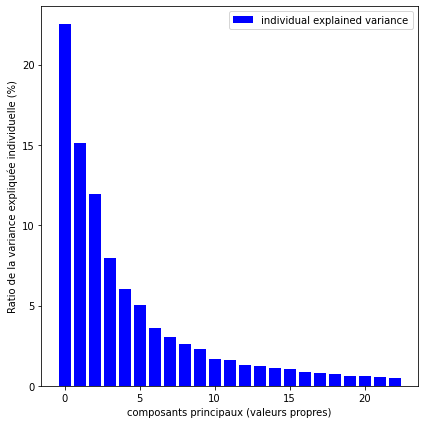

In [ ]:
''''
l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 6))
plt.bar(range(23), TopTen_var_explained_fac,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

In [ ]:
new_eigen_vectors =new_eigen_vectors[:,sort_list[:8]]
new_eigen_values_2=[]
for i in range(8):
  new_eigen_values_2.append(new_eigen_values_1[sort_list[i]])
new_eigen_values_2

calculVariance(eig_values,new_eigen_values_2)

75.2618748411949

###7.Le nouvel axe

In [ ]:
final_fac = scaled_mfeat_fac @ new_eigen_vectors
final_fac.shape

(2000, 8)

In [ ]:
'''Affichage du nouvel axe '''
final_fac

array([[ 6.7787959 , -7.63151591,  5.50154376, ..., -2.37423027,
         1.35311859,  0.41862921],
       [ 4.75550231, -8.55026867,  3.30241962, ..., -3.62772265,
        -0.27656325,  0.64281016],
       [ 7.43552137, -8.83275339,  2.21304474, ..., -2.61281213,
         1.47710188,  2.49520706],
       ...,
       [-4.17896406, -5.86069348, -2.87097132, ..., -2.53965607,
        -3.46551665, -4.04646205],
       [-2.87632503, -8.83458082, -5.4222979 , ..., -0.45239751,
        -0.24317357, -1.81990294],
       [-9.70931137, -1.02173414,  2.39377472, ..., -4.08326685,
        -0.74396879, -0.63165393]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (fac0) et la deuxième colonne (fac1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principales')

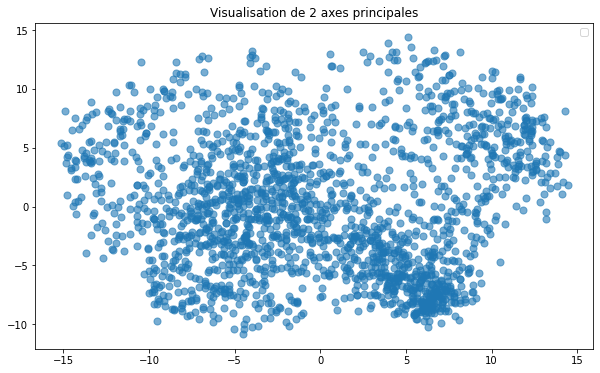

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fac[:,0], final_fac[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principales'.format(2))

entre la 1re colonne(fac0) et la 10ème(fac9) colonne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principales')

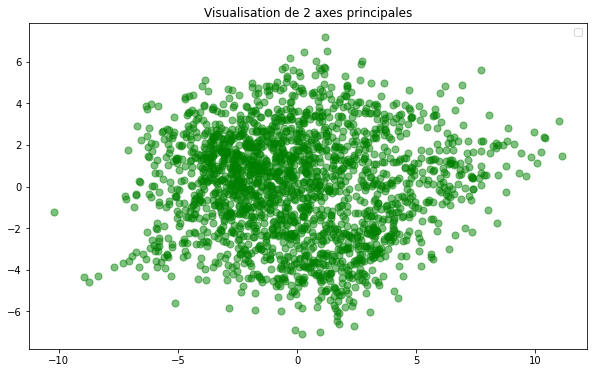

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fac[:,5], final_fac[:,7],alpha = 0.5,s=50,c="green") #La valeur de fusion alpha, entre 0 (transparent) et 1 (opaque).
plt.legend()
plt.title('Visualisation de {} axes principales'.format(2))


##**METHODE KMEANS**

###1.Choix du meilleur nombre de cluster

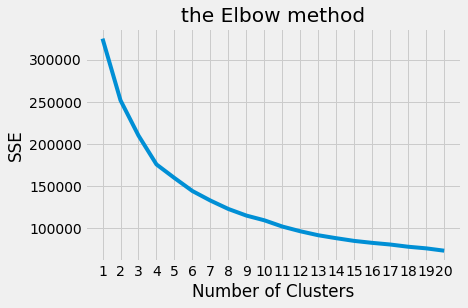

In [ ]:
# kmeans_kwargs = {
# "init": "random",
# "n_init": 10,
# "max_iter": 300,
# "random_state": 42,
# }

# # Within cluster sum squares
# sse = [] 

# for i in range(1,21):
#     km = KMeans(n_clusters= i, **kmeans_kwargs)
#     km.fit(final_fac)
#     sse.append(km.inertia_)
    
# # ploting the elbow graph
# plt.plot(range(1,21), sse, 'og-', c="green")
# #plt.annotate('elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='red', shrink=0.05))
# plt.title("The elbow method")
# plt.xlabel("nombre de clusters")
# plt.ylabel("SSE");





kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_fac)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.title("the Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random", #choisir n_clusters des observations (lignes) au hasard à partir des données pour les centroïdes initiaux.
n_clusters=10, #Le nombre de clusters à former.
n_init=10, #Nombre de fois où l'algorithme k-means sera exécuté avec différentes graines centroïdes
max_iter=300, # Nombre maximal d'itérations de l'algorithme k-means à exécuter.
random_state=42) #Détermine la génération de nombres aléatoires pour l'initialisation du centroïde

In [ ]:
# fitting the values
kmeans.fit(final_fac)

KMeans(init='random', n_clusters=10, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)
#l'inertie est calculé en mesurant la distance entre chaque point de données et son centre de gravité

La valeur de SSE:  109465.65648117595


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[  6.17420493,   5.00326527,  -7.34112071,  -1.87477977,
         -0.95772432,  -3.09449384,   0.25983966,   1.20559408],
       [  9.94365266,   5.85310885,   0.17315061,  -0.19264644,
          0.8572187 ,   0.63505979,   1.12216248,  -2.36831055],
       [ -3.53375169,   0.37566532,  -2.54546182,   4.97963278,
          5.48988749,  -0.18380609,  -1.75062059,   0.99361435],
       [ -5.47320143,  -4.9496451 ,  -1.07988417,  -5.36802993,
          0.16043802,  -0.91412202,  -0.98860351,  -0.83834878],
       [ -3.91605529,   4.05522983,   6.11382566,  -2.66900674,
          0.24594631,   1.74494596,   0.7859652 ,   0.75703424],
       [ -7.5028917 ,   7.23307705,   3.30994986,   1.13858448,
         -2.97745891,  -0.75491158,  -3.0301391 ,   0.57559115],
       [  2.82588962,  -3.55739533,   1.15053084,  -0.4881646 ,
          5.01431567,   1.67614606,  -0.77901515,   1.74541643],
       [  5.56059169,  -6.20004647,   3.6947825 ,   2.53251652,
         -2.32638371,  -0.5807959

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  22


###Obtenir les labels

In [ ]:
kmeans.labels_

array([7, 7, 7, ..., 3, 3, 3], dtype=int32)

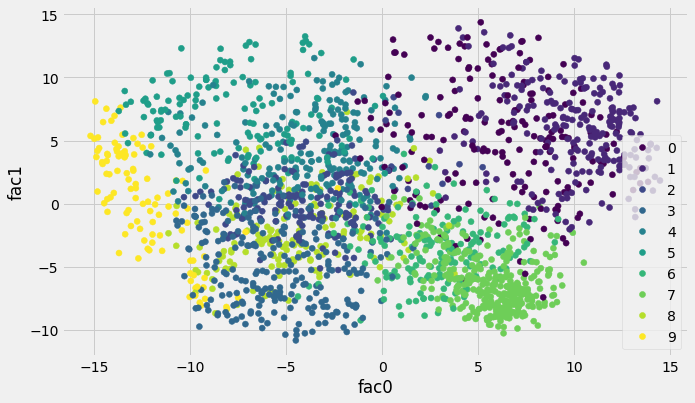

In [ ]:
# ploting the graph
plt.figure(figsize=(10,6))
scatter = plt.scatter(x= final_fac[:, 0], y=final_fac[:, 1], c= kmeans.labels_)
plt.xlabel('fac0')
plt.ylabel('fac1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8,9]);

###Affichage du centre des cluster

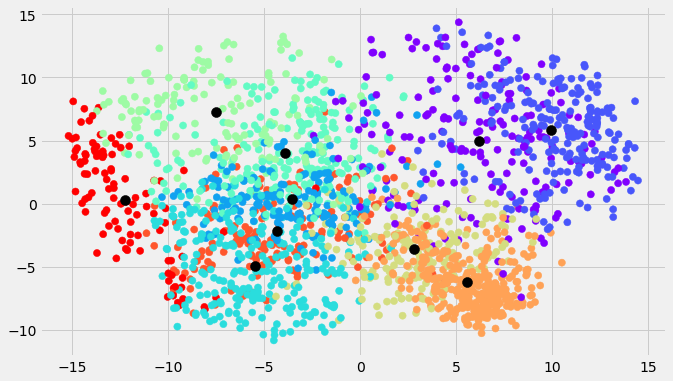

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fac[:,0], final_fac[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-FOU

In [ ]:
mfeat_fou= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-fou'
mfeat_fou= pd.read_fwf(mfeat_fou, header=None)

In [ ]:
mfeat_fou.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


In [ ]:
mfeat_fou.shape

(2000, 76)

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_fou,"fou")
mfeat_fou.head()


,fou0,fou1,fou2,fou3,fou4,fou5,fou6,fou7,fou8,fou9,...,fou66,fou67,fou68,fou69,fou70,fou71,fou72,fou73,fou74,fou75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


##**METHODE ACP** 

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_fou=scaler.fit_transform(mfeat_fou)


In [ ]:
scaled_mfeat_fou

array([[-1.30245067, -1.02163771, -1.20012317, ...,  0.96643443,
        -1.09773269,  1.03419088],
       [-1.48465024, -1.14276502, -1.18787917, ...,  1.35514092,
        -0.70064333,  1.10923272],
       [-1.64759166, -0.84944988, -1.16430673, ...,  1.35324753,
        -0.84945383,  0.35541552],
       ...,
       [ 1.63332598, -0.33421707, -0.08285457, ..., -0.96360498,
        -1.2284496 , -0.83986832],
       [ 0.74411332, -1.16982877,  0.24099543, ..., -0.28603576,
        -0.47077484, -0.71444403],
       [ 0.93638811, -1.29563629, -0.26550368, ...,  0.06095674,
        -1.43514367, -1.07872483]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_fou= np.cov(scaled_mfeat_fou,rowvar=False)
cov_mfeat_fou

array([[ 1.00050025,  0.19555311,  0.43266148, ..., -0.12253453,
         0.10539477, -0.29394054],
       [ 0.19555311,  1.00050025,  0.24074263, ..., -0.13737745,
         0.33252197, -0.09629971],
       [ 0.43266148,  0.24074263,  1.00050025, ..., -0.19308768,
         0.21520741, -0.30661746],
       ...,
       [-0.12253453, -0.13737745, -0.19308768, ...,  1.00050025,
        -0.04114088,  0.67916838],
       [ 0.10539477,  0.33252197,  0.21520741, ..., -0.04114088,
         1.00050025, -0.06326943],
       [-0.29394054, -0.09629971, -0.30661746, ...,  0.67916838,
        -0.06326943,  1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_fou)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[ 0.15046806 -0.03111664  0.20706618 ...  0.01492899 -0.03033897
   0.01403655]
 [ 0.11867826 -0.15835549  0.0453913  ...  0.01284087  0.08451019
  -0.11130255]
 [ 0.16393438 -0.05323505  0.20503115 ... -0.07082936  0.01563042
  -0.05727863]
 ...
 [-0.1466377   0.04469457  0.17032854 ...  0.05548475 -0.0938626
   0.0194451 ]
 [ 0.05500919 -0.15895535 -0.00750021 ...  0.00645582  0.0255439
   0.1916024 ]
 [-0.18172819  0.00643235  0.07526982 ...  0.00111033  0.11521261
  -0.0299337 ]]

...............

eig_values [11.87739445  5.1910036   4.7519204   2.7580267   2.53692987  2.43122751
  2.17302359  2.02116597  1.90406558  1.73318944  1.63063843  1.59045936
  1.49739335  1.44551035  1.35984002  1.33433016  1.20381087  1.12003345
  1.06858448  1.0512629   0.96831123  0.91906767  0.87505132  0.8581855
  0.84070269  0.81003894  0.78865725  0.76001047  0.74549702  0.09716239
  0.71698074  0.70331094  0.12979616  0.68369564  0.66230048  0.64682231
  0.14184372  0.15006301  0.1578

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 20

dimension : (76, 20)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

66.65061920711098

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 20
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[ 0.15046806, -0.03111664,  0.20706618, ..., -0.07373498,
         0.15095269, -0.15066933],
       [ 0.11867826, -0.15835549,  0.0453913 , ..., -0.0378965 ,
        -0.08854928, -0.06043822],
       [ 0.16393438, -0.05323505,  0.20503115, ..., -0.0261486 ,
         0.01202775, -0.04924969],
       ...,
       [-0.1466377 ,  0.04469457,  0.17032854, ..., -0.1106306 ,
        -0.13780401,  0.11394199],
       [ 0.05500919, -0.15895535, -0.00750021, ...,  0.0476117 ,
         0.1149406 , -0.09638697],
       [-0.18172819,  0.00643235,  0.07526982, ..., -0.04948466,
        -0.16114159,  0.17719205]])

##5.Variance expliqué

In [ ]:
variance_explained_fou = []  
for i in eig_values: 
    variance_explained_fou.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_fou)



quantité d'informations en %

[15.620336513397836, 6.826852767051761, 6.249400574786599, 3.6271680120196717, 3.3363965885429705, 3.1973840738600185, 2.857811941760388, 2.658099194628853, 2.5040967728859433, 2.2793721701636906, 2.1445040948066114, 2.0916633334539236, 1.9692692781818257, 1.9010363070668626, 1.7883685571250374, 1.7548197312142644, 1.583169696428578, 1.472991356527435, 1.4053292001301207, 1.3825490430786067, 1.2734566776329403, 1.2086949161969818, 1.1508076245616046, 1.1286268507815793, 1.1056346582427325, 1.0653077930479957, 1.0371880497918733, 0.9995137638112028, 0.9804266753999858, 0.12778132966326364, 0.9429240084032321, 0.9249464217894715, 0.17069902439403956, 0.8991497254346806, 0.8710122782341414, 0.8506564510554088, 0.18654315856466586, 0.1973526072159022, 0.207557054257432, 0.21188409309191486, 0.22478157022326628, 0.23901799672181206, 0.8013925653578743, 0.7851036185723864, 0.2625283794116016, 0.2682023428859558, 0.7590467563160801, 0.28286729929013144, 0.2899567

##représentation graphique de la variance expliquée individuelle en % des 15 premières valeurs propres 

In [ ]:
TopTen_var_explained_fou = variance_explained_fou[:15]
TopTen_var_explained_fou

[15.620336513397836,
 6.826852767051761,
 6.249400574786599,
 3.6271680120196717,
 3.3363965885429705,
 3.1973840738600185,
 2.857811941760388,
 2.658099194628853,
 2.5040967728859433,
 2.2793721701636906,
 2.1445040948066114,
 2.0916633334539236,
 1.9692692781818257,
 1.9010363070668626,
 1.7883685571250374]

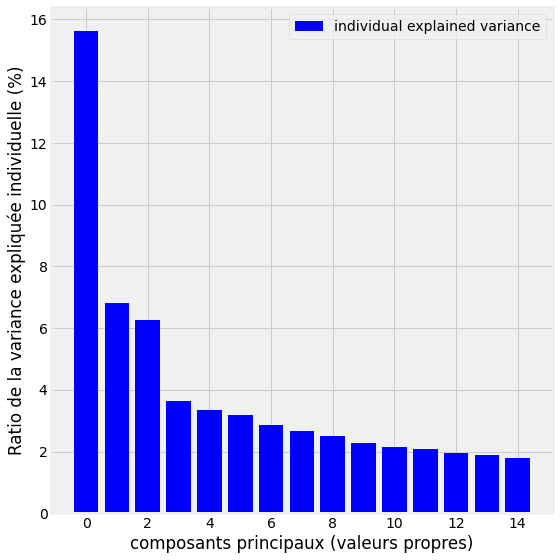

In [ ]:
''''
l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(8,8))
plt.bar(range(15), TopTen_var_explained_fou,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

###7.Le nouvel axe

In [ ]:
final_fou = scaled_mfeat_fou @ eig_vectors_sorted
final_fou.shape

(2000, 20)

In [ ]:
'''Affichage du nouvel axe '''
final_fou

array([[-3.49599128,  3.47793621, -1.17321002, ...,  1.25533346,
         0.17189567,  2.5810509 ],
       [-6.10418037,  4.8616601 , -1.46004411, ...,  0.03355461,
        -0.13970694, -0.07953586],
       [-5.80788646,  4.9469388 , -0.41406823, ..., -0.01776179,
         0.49389522, -1.18483815],
       ...,
       [ 3.38308782,  3.71727628,  0.18764651, ...,  0.72900946,
        -0.92935732, -0.48770204],
       [ 1.48119561,  1.00702109,  1.60350325, ..., -0.04261656,
         0.8889018 ,  0.70766882],
       [ 0.22584946, -1.50856269,  1.34827983, ..., -0.12157647,
         0.17137633, -1.00836102]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (fou0) et la deuxième colonne (fou1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

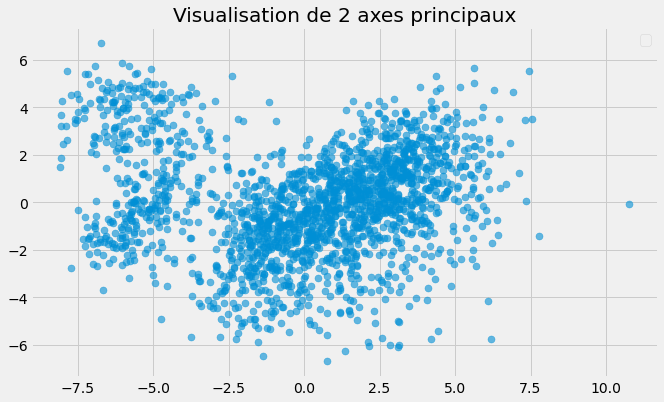

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fou[:,0], final_fou[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))

entre la 1re colonne(fou0) et la 10ème(fou9) colonne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

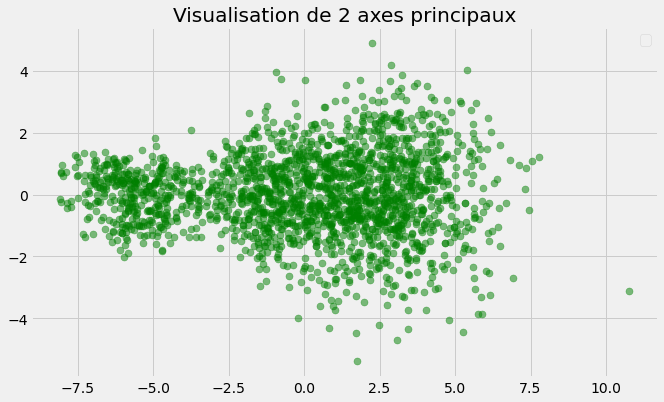

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fou[:,0], final_fou[:,9],alpha = 0.5,s=50,c="green")
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))


##**METHODE KMEANS**

###1.Choix du meilleur nombre de cluster

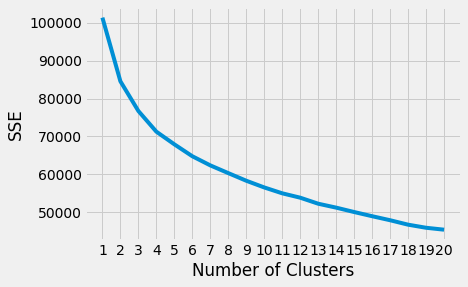

In [ ]:

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_fou)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=12,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_fou)

KMeans(init='random', n_clusters=12, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  53876.68200679392


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[-9.15368428e-02, -1.73859640e+00, -1.14268721e+00,
         1.31146928e+00,  6.37509131e-01,  1.88210703e-01,
         1.63603288e-01,  1.14903083e+00, -1.22501554e-01,
        -4.71136605e-02,  8.79745041e-01, -1.26508329e-02,
         1.60913939e-01, -6.35269748e-01,  3.10688128e-01,
         4.17554495e-01,  4.59406992e-01, -2.05359002e-01,
         1.08855180e-01, -1.85393220e-01],
       [-1.45711028e+00, -2.88831951e+00,  5.63341846e-01,
         8.54413486e-02, -4.07122543e-01,  4.61068697e-01,
        -1.20180279e+00, -9.54156726e-01,  1.15453639e-01,
         3.48701899e-02, -8.67744185e-01,  2.57728623e-01,
         3.44906881e-01,  3.92972029e-01, -4.46526760e-01,
         2.14679194e-01, -2.43550967e-01,  3.26409814e-01,
        -3.82085689e-01,  9.77635170e-02],
       [-5.32750972e+00, -5.13658357e-01, -1.87172060e-02,
         1.75657825e-01, -4.31576283e-01, -1.25109018e+00,
         3.23430033e-01,  2.91044586e-01,  2.37299583e-01,
        -2.49196400e-01,  3.0

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  30


###Obtenir les labels

In [ ]:
kmeans.labels_

array([8, 8, 8, ..., 5, 3, 3], dtype=int32)

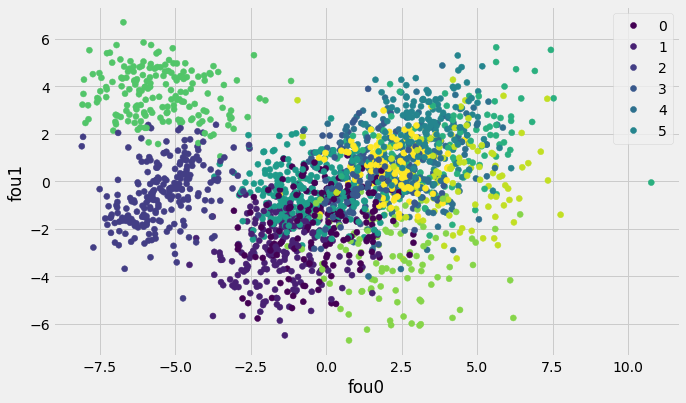

In [ ]:
# ploting the graph
plt.figure(figsize=(10,6))
scatter = plt.scatter(x= final_fou[:, 0], y=final_fou[:, 1], c= kmeans.labels_)
plt.xlabel('fou0')
plt.ylabel('fou1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5]);

###Affichage du centre des cluster

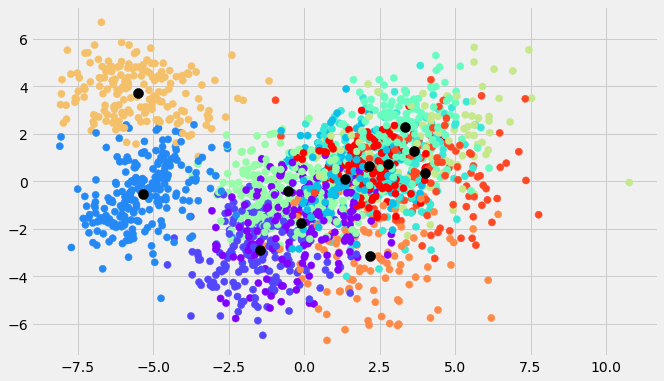

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fou[:,0], final_fou[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-KAR

In [ ]:
mfeat_kar= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-kar'
mfeat_kar= pd.read_fwf(mfeat_kar, header=None)

In [ ]:
mfeat_kar.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847


In [ ]:
mfeat_kar.shape

(2000, 64)

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_kar,"kar")
mfeat_kar.head()


,kar0,kar1,kar2,kar3,kar4,kar5,kar6,kar7,kar8,kar9,...,kar54,kar55,kar56,kar57,kar58,kar59,kar60,kar61,kar62,kar63
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847


###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_kar=scaler.fit_transform(mfeat_kar)


In [ ]:
scaled_mfeat_kar

array([[-1.19354001, -1.92157541,  1.79795999, ...,  2.07224197,
        -1.78357951, -0.28517412],
       [-0.50934996, -2.1347926 , -0.2929632 , ...,  0.5951963 ,
         0.45132277,  0.7765261 ],
       [-1.10798694, -1.0447846 , -0.25122886, ...,  1.2753739 ,
         0.65839276, -1.54896781],
       ...,
       [ 0.39028304, -1.56883781, -0.26423467, ..., -0.43339942,
         0.05290387, -0.23329375],
       [-0.05351061, -1.66208204, -0.5161914 , ...,  1.61711592,
         0.21936254, -0.04247747],
       [ 1.60884916, -0.92296445,  0.66194896, ...,  0.06404164,
         0.58753766,  0.21712698]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_kar= np.cov(scaled_mfeat_kar,rowvar=False)
cov_mfeat_kar

array([[ 1.00050025e+00, -4.46513351e-04,  1.96931171e-01, ...,
        -7.52134306e-02, -9.78795386e-02, -1.25628081e-01],
       [-4.46513351e-04,  1.00050025e+00, -1.29087153e-01, ...,
        -2.56126505e-01, -2.04172250e-02,  4.96276555e-02],
       [ 1.96931171e-01, -1.29087153e-01,  1.00050025e+00, ...,
        -2.21515291e-02, -1.18672732e-02, -1.45125074e-01],
       ...,
       [-7.52134306e-02, -2.56126505e-01, -2.21515291e-02, ...,
         1.00050025e+00, -1.62243510e-02,  8.04737306e-03],
       [-9.78795386e-02, -2.04172250e-02, -1.18672732e-02, ...,
        -1.62243510e-02,  1.00050025e+00, -1.02440047e-01],
       [-1.25628081e-01,  4.96276555e-02, -1.45125074e-01, ...,
         8.04737306e-03, -1.02440047e-01,  1.00050025e+00]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_kar)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[-0.15310319  0.19669977  0.11094616 ...  0.06273032  0.01426634
  -0.00032726]
 [ 0.12502594  0.00534038  0.21574869 ...  0.04402448  0.04856633
   0.05142022]
 [-0.07395639  0.25825949 -0.05091916 ... -0.05107877  0.08326129
  -0.03703586]
 ...
 [-0.03610289 -0.08871424 -0.12904238 ...  0.09452781  0.08716302
   0.14846423]
 [-0.10322093 -0.07798013  0.07636694 ... -0.09698721 -0.14554903
   0.22717961]
 [ 0.20127712 -0.05742226  0.05943326 ... -0.02138989 -0.22458268
   0.14889608]]

...............

eig_values [5.83841191 4.96978162 3.53759076 3.22646824 2.64886299 2.36666349
 2.09946116 1.91135253 1.70282041 1.52315628 1.47617037 1.41400688
 1.37926124 1.30494395 1.25181896 1.16148189 0.02159187 1.09484651
 1.07356185 1.03595657 0.05817555 1.00998214 0.96242273 0.1120584
 0.9306527  0.90878275 0.86459573 0.17607101 0.79674425 0.80161095
 0.20659732 0.77563492 0.74664951 0.72812541 0.71810368 0.69431762
 0.68718647 0.66174497 0.24727396 0.25705066 0.27046113 0.63311606

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 20

dimension : (64, 20)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

65.6337288129092

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 20
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[-0.15310319,  0.19669977,  0.11094616, ..., -0.04802092,
         0.10182615,  0.02413103],
       [ 0.12502594,  0.00534038,  0.21574869, ...,  0.02886419,
         0.09271245, -0.06456008],
       [-0.07395639,  0.25825949, -0.05091916, ...,  0.12071324,
        -0.06477037, -0.11743851],
       ...,
       [-0.03610289, -0.08871424, -0.12904238, ...,  0.10578349,
        -0.08209256, -0.05853218],
       [-0.10322093, -0.07798013,  0.07636694, ..., -0.06866307,
        -0.21605113,  0.15753303],
       [ 0.20127712, -0.05742226,  0.05943326, ..., -0.21044594,
         0.14342787, -0.07719875]])

##5.Variance expliqué

In [ ]:
variance_explained_kar = []  
for i in eig_values: 
    variance_explained_kar.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_kar)

# a=sum(variance_explained_kar)
# print(a)

quantité d'informations en %

[9.117957356949939, 7.761401131917714, 5.524721812428796, 5.038835944395036, 4.136779000351611, 3.696062740400762, 3.2787678624524217, 2.9849950816065918, 2.659326555226632, 2.378741723347394, 2.305362943579214, 2.208281052882705, 2.1540181332125963, 2.037955440856037, 1.9549891468313338, 1.813908051978437, 0.033720422165688935, 1.709842326747942, 1.6766016671828385, 1.6178728004082987, 0.0908538515866952, 1.5773080401528905, 1.503033617358015, 0.17500370058738435, 1.4534177730556421, 1.4192630592350954, 1.3502553602219411, 0.2749734002579671, 1.2442904373187191, 1.2518908504148418, 0.3226469084825624, 1.2113235959773514, 1.1660565358882995, 1.1371271073364502, 1.121475986165374, 1.0843288481858921, 1.0731919958855864, 1.0334595314655766, 0.38617237301417023, 0.40144083744114745, 0.42238421415253313, 0.9887492263659832, 0.9810967626356718, 0.4641047700260066, 0.479065107861868, 0.4816986374228543, 0.5091316830138612, 0.9396724389053552, 0.9014514822413588,

##représentation graphique de la variance expliquée individuelle en % des 10 premières valeurs propres 

In [ ]:
TopTen_var_explained_kar = variance_explained_kar[:10]
TopTen_var_explained_kar

[9.117957356949939,
 7.761401131917714,
 5.524721812428796,
 5.038835944395036,
 4.136779000351611,
 3.696062740400762,
 3.2787678624524217,
 2.9849950816065918,
 2.659326555226632,
 2.378741723347394]

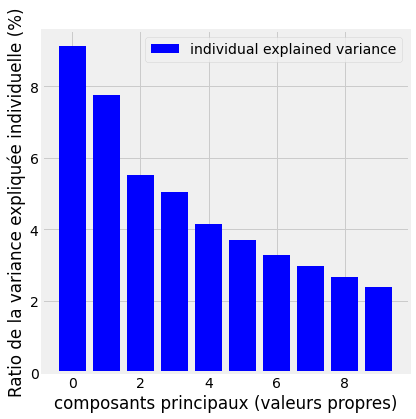

In [ ]:
''''
diagramme de l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,6))
plt.bar(range(10), TopTen_var_explained_kar,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

###7.Le nouvel axe

In [ ]:
final_kar = scaled_mfeat_kar@ eig_vectors_sorted
final_kar.shape

(2000, 20)

In [ ]:
'''Affichage du nouvel axe '''
final_kar

array([[ 0.71583552,  0.61348069, -1.33536825, ..., -0.30400182,
        -0.52785212, -1.92483128],
       [ 2.03544475,  0.13758314, -0.32183426, ...,  0.18430704,
        -1.35126551, -0.26943392],
       [-1.83445857,  1.40730881, -0.28258349, ...,  2.05601213,
        -0.43261696, -0.99874582],
       ...,
       [-3.9476071 , -0.85716891, -0.48699206, ...,  0.95717726,
        -0.50585169,  0.64929784],
       [-1.08636848, -0.13264969, -0.36732108, ...,  1.08461378,
         0.54368397,  0.52012612],
       [-2.18281513,  0.44233699,  0.32072698, ..., -0.82598653,
        -0.48759142,  0.17829235]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (kar0) et la deuxième colonne (kar1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

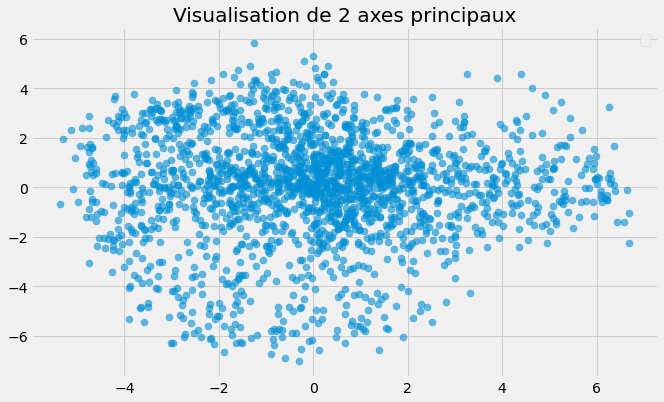

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_kar[:,0], final_kar[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()


entre la 1re colonne(kar0) et la 10ème(kar10) colonne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

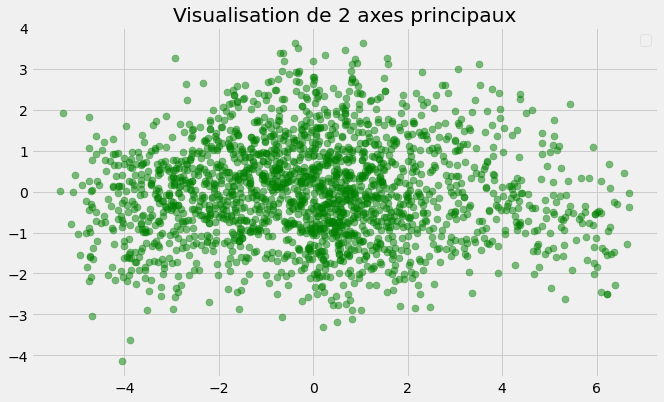

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_kar[:,0], final_kar[:,9],alpha = 0.5,s=50,c="green")
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()

#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

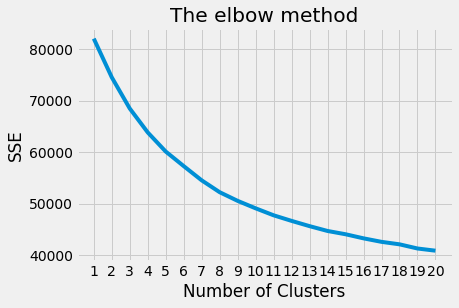

In [ ]:

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_kar)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=10,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_kar) # Calculer le clustering k-means.

KMeans(init='random', n_clusters=10, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  49094.72086769722


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_


array([[-9.52855037e-01, -4.61865075e+00,  1.23673232e+00,
         9.86793294e-02, -1.07418423e+00, -1.53665610e-01,
        -5.84519879e-02,  1.71858341e-01, -3.30306482e-01,
         4.01101138e-01,  1.33313705e-02,  3.69841381e-01,
        -3.97424568e-01,  2.57454677e-01,  5.36530818e-02,
        -1.69476494e-01,  3.66589294e-02, -1.28242530e-01,
        -2.58887002e-01,  1.25459588e-01],
       [ 7.60513796e-01, -1.31905049e-01, -8.65987362e-01,
         2.18052442e+00,  1.99248595e+00,  1.73412287e-01,
         1.48957518e+00,  1.27580447e+00, -8.47648416e-01,
         9.02278347e-02,  2.26875487e-01,  3.52294815e-01,
        -6.72067096e-02, -1.43652126e-01, -3.75167685e-01,
         1.32342334e-01, -1.65679525e-02,  1.41516744e-01,
        -1.38562399e-01, -1.10060051e-01],
       [ 3.95222218e-01,  5.48258899e-01, -1.94653350e+00,
        -2.13687356e+00, -6.09451884e-01,  9.12725594e-02,
         4.87674431e-01,  5.89402722e-02, -1.14908554e+00,
        -3.65459308e-01, -6.7

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  25


###Obtenir les labels

In [ ]:
kmeans.labels_

array([4, 1, 1, ..., 9, 9, 9], dtype=int32)

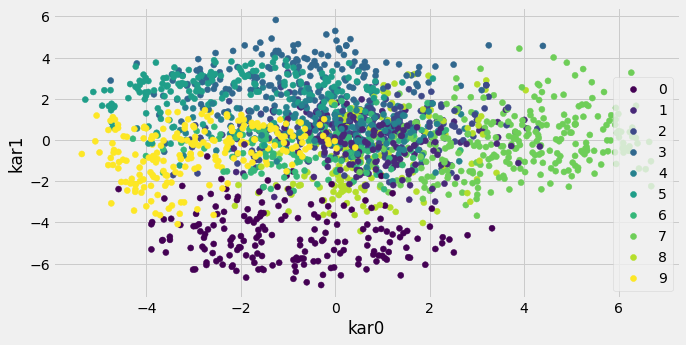

In [ ]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= final_kar[:, 0], y=final_kar[:, 1], c= kmeans.labels_)
plt.xlabel('kar0')
plt.ylabel('kar1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8,9]);

###Affichage du centre des cluster

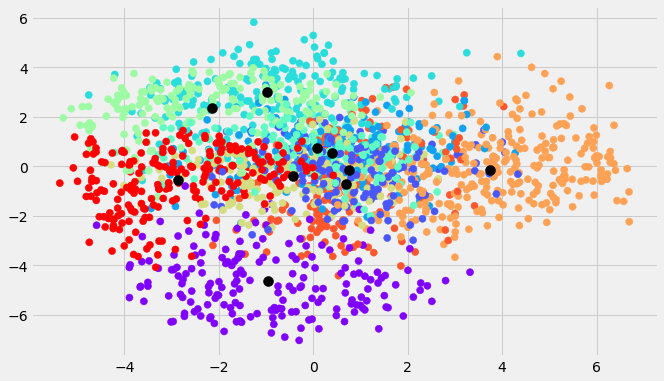

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_kar[:,0], final_kar[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-MOR

In [ ]:
mfeat_mor= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-mor'
mfeat_mor= pd.read_fwf(mfeat_mor, header=None)

In [ ]:
mfeat_mor.head()

,0,1,2,3,4,5
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235


In [ ]:
mfeat_mor.shape

(2000, 6)

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_mor,"mor")
mfeat_mor.head()


,mor0,mor1,mor2,mor3,mor4,mor5
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235


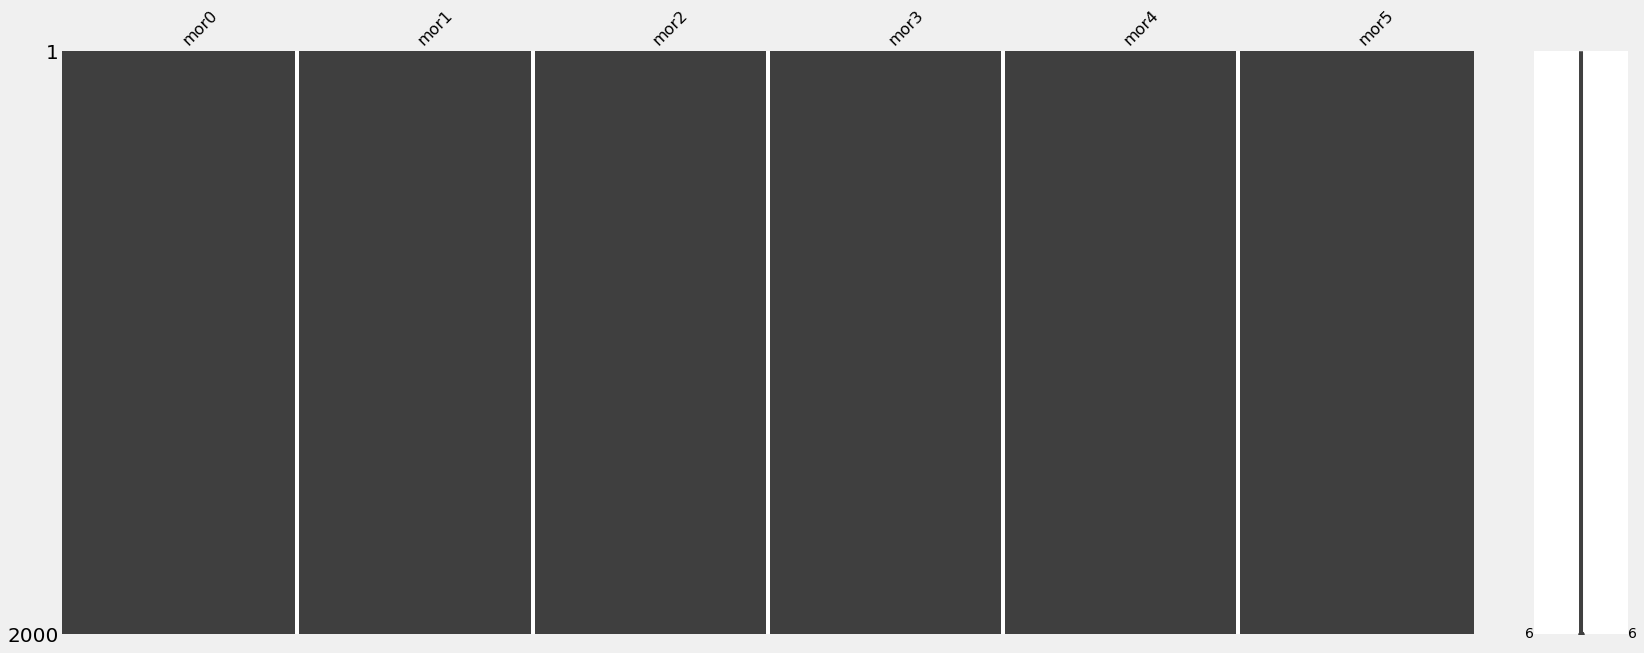

In [ ]:
missingno.matrix(mfeat_mor)

##**METHODE ACP** 

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_mor=scaler.fit_transform(mfeat_mor)


In [ ]:
scaled_mfeat_mor

array([[ 0.76340069, -1.51835049, -1.01989185, -0.93058101, -1.12578212,
        -1.01733935],
       [ 0.76340069, -1.51835049, -1.01989185, -1.18758235, -1.15650489,
        -1.02159111],
       [ 0.76340069, -1.51835049, -1.01989185, -1.00964912, -1.10058579,
        -1.03735175],
       ...,
       [ 0.76340069, -0.64246327,  0.4095291 , -0.86971016, -0.33505175,
        -0.17903648],
       [ 0.76340069, -0.64246327,  0.4095291 , -0.53959982, -0.73199323,
        -0.04173786],
       [ 0.76340069, -0.64246327,  0.4095291 , -0.89978564, -0.25733936,
        -0.16292369]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_mor= np.cov(scaled_mfeat_mor,rowvar=False)
cov_mfeat_mor

array([[ 1.00050025, -0.85056805,  0.51652134, -0.60955334, -0.66653854,
        -0.42017847],
       [-0.85056805,  1.00050025, -0.00106756,  0.61684767,  0.67512256,
         0.47225883],
       [ 0.51652134, -0.00106756,  1.00050025, -0.14390801, -0.16476398,
        -0.03221658],
       [-0.60955334,  0.61684767, -0.14390801,  1.00050025,  0.93822929,
         0.21968417],
       [-0.66653854,  0.67512256, -0.16476398,  0.93822929,  1.00050025,
         0.33702973],
       [-0.42017847,  0.47225883, -0.03221658,  0.21968417,  0.33702973,
         1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_mor)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[ 0.48622068 -0.26070867 -0.16781786  0.40379078  0.70888142  0.04356305]
 [-0.46731845 -0.23382263  0.13147161 -0.5897947   0.60149279  0.00207037]
 [ 0.16446563 -0.8903755  -0.11830336 -0.17781069 -0.36682911 -0.00256992]
 [-0.45503877 -0.09339376 -0.47397188  0.31678997  0.02671886 -0.67712495]
 [-0.48186764 -0.10311945 -0.34101     0.32864499 -0.02018619  0.72970345]
 [-0.28088657 -0.25540835  0.77435104  0.49911437  0.00292751 -0.08441595]]

...............

eig_values [3.46648424 1.10804264 0.89377706 0.47534082 0.00576776 0.05358899]


###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 2

dimension : (6, 2)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

76.20399354041062

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


array([0, 1])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 2
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[ 0.48622068, -0.26070867],
       [-0.46731845, -0.23382263],
       [ 0.16446563, -0.8903755 ],
       [-0.45503877, -0.09339376],
       [-0.48186764, -0.10311945],
       [-0.28088657, -0.25540835]])

##5.Variance expliqué

In [ ]:
variance_explained_mor = []  
for i in eig_values: 
    variance_explained_mor.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_mor)



quantité d'informations en %

[57.74584997856611, 18.458143561844516, 14.888836117790241, 7.9183857825122645, 0.09608127219276769, 0.892703287094084]


##Représentation graphique de la variance expliquée

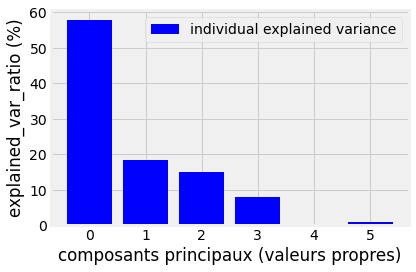

In [ ]:
''''
l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))
plt.bar(range(6), variance_explained_mor,color = "blue", align='center',label='individual explained variance')
plt.ylabel('explained_var_ratio (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

###7.Le nouvel axe

In [ ]:
final_mor = scaled_mfeat_mor@ eig_vectors_sorted
final_mor.shape

(2000, 2)

In [ ]:
'''Affichage du nouvel axe '''
final_mor

array([[ 2.16468263,  1.52692369],
       [ 2.29762677,  1.55518006],
       [ 2.1941416 ,  1.53682126],
       ...,
       [ 1.34626099, -0.25193414],
       [ 1.3487559 , -0.27689921],
       [ 1.31797354, -0.26125428]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (mor0) et la deuxième colonne (mor1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

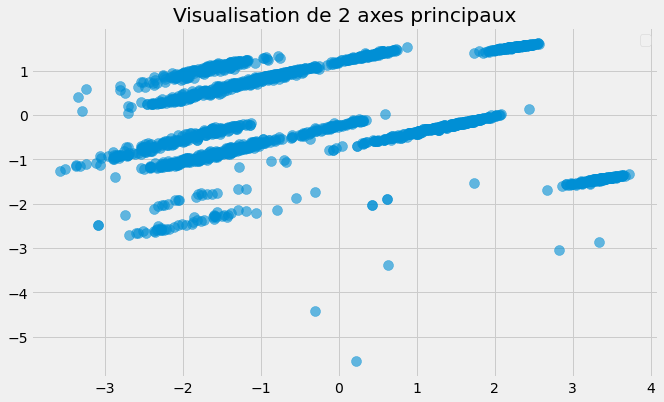

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_mor[:,0], final_mor[:,1],alpha = 0.6,s=100)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
# plt.grid()


#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

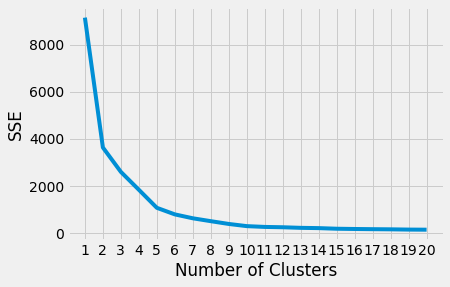

In [ ]:

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_mor)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=5,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_mor)

KMeans(init='random', n_clusters=5, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  1068.5641874334017


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[-1.79298655, -0.94892377],
       [ 1.63811625,  1.47956234],
       [ 3.32410625, -1.46814769],
       [-1.3545416 ,  0.83513572],
       [ 1.14514626, -0.28536842]])

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  11


###Obtenir les labels

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

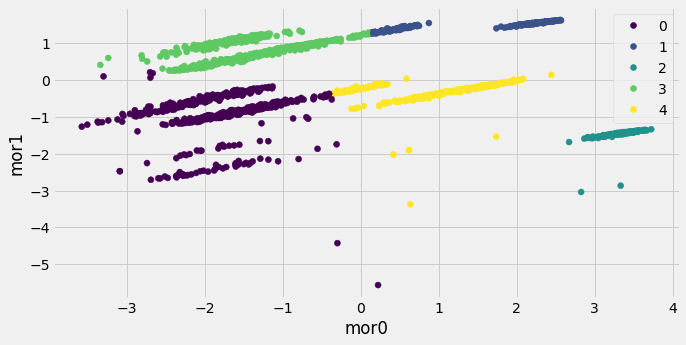

In [ ]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= final_mor[:, 0], y=final_mor[:, 1], c= kmeans.labels_)
plt.xlabel('mor0')
plt.ylabel('mor1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4]);

###Affichage du centre des cluster

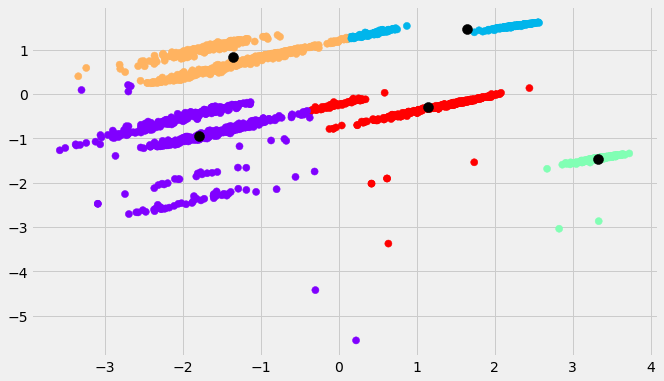

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_mor[:,0], final_mor[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-PIX 🚨🚨:

240 moyennes de pixels dans des fenêtres 2 x 3

In [ ]:
mfeat_pix= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-pix'
mfeat_pix= pd.read_fwf(mfeat_pix, header=None)

FileNotFoundError: ignored

In [ ]:
mfeat_pix.head()

In [ ]:
mfeat_pix.shape

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_pix,"pix")
mfeat_pix.head()


##**METHODE ACP** 

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_pix=scaler.fit_transform(mfeat_pix)


In [ ]:
scaled_mfeat_pix

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_pix= np.cov(scaled_mfeat_pix,rowvar=False)
cov_mfeat_pix

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_pix)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 33
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

##5.Variance expliqué

In [ ]:
variance_explained_pix = []  
for i in eig_values: 
    variance_explained_pix.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_pix)



##représentation graphique de la variance expliquée individuelle en % des 10 premières valeurs propres 

In [ ]:
TopTen_var_explained_pix = variance_explained_pix[:33]
TopTen_var_explained_pix

##Représentation graphique de la variance expliquée

In [ ]:
''''
l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,5))
plt.bar(range(33), TopTen_var_explained_pix,color = "blue", align='center',label='individual explained variance')
plt.ylabel('explained_var_ratio (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

In [ ]:
new_eigen_vectors =new_eigen_vectors[:,sort_list[:18]]
new_eigen_values_2=[]
for i in range(18):
  new_eigen_values_2.append(new_eigen_values_1[sort_list[i]])
new_eigen_values_2

calculVariance(eig_values,new_eigen_values_2)

###7.Le nouvel axe

In [ ]:
final_pix = scaled_mfeat_pix@ new_eigen_vectors
final_pix.shape

In [ ]:
'''Affichage du nouvel axe '''
final_pix

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (pix0) et la deuxième colonne (pix1)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_pix[:,0], final_pix[:,1],alpha = 0.6,s=100)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
# plt.grid()


entre la 17 colonne (pix16) et la 18e colonne (pix17)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_pix[:,16], final_pix[:,17],alpha = 0.6,s=100,c='red')
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
# plt.grid()


#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_pix)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=10,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_pix)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

###Obtenir les labels

In [ ]:
kmeans.labels_

In [ ]:
# ploting the graph
plt.figure(figsize=(10,6))
scatter = plt.scatter(x= final_pix[:, 0], y=final_pix[:, 1], c= kmeans.labels_)
plt.xlabel('pix0')
plt.ylabel('pix1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4,5,6,7,8,9]);

###Affichage du centre des cluster

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_pix[:,0], final_pix[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-ZER 🚨🚨

In [ ]:
mfeat_zer= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-zer'
mfeat_zer= pd.read_fwf(mfeat_zer, header=None)

In [ ]:
mfeat_zer.head()

In [ ]:
mfeat_zer.shape

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_zer,"zer")
mfeat_zer.head()


###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_zer=scaler.fit_transform(mfeat_zer)


In [ ]:
scaled_mfeat_zer

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_zer= np.cov(scaled_mfeat_zer,rowvar=False)
cov_mfeat_zer

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_zer)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 11
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

##5.Variance expliqué

In [ ]:
variance_explained_zer = []  
for i in eig_values: 
    variance_explained_zer.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_zer)

# a=sum(variance_explained_zer)
# print(a)

##représentation graphique de la variance expliquée individuelle en % des 10 premières valeurs propres 

In [ ]:
TopTen_var_explained_zer = variance_explained_zer[:10]
TopTen_var_explained_zer

In [ ]:
''''
diagramme de l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,5))
plt.bar(range(10), TopTen_var_explained_zer,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

###7.Le nouvel axe

In [ ]:
final_zer = scaled_mfeat_zer@ eig_vectors_sorted
final_zer.shape

In [ ]:
'''Affichage du nouvel axe '''
final_zer

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (zer0) et la deuxième colonne (zer1)

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_zer[:,0], final_zer[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()


entre la 9e colonne(zer9) et la 10ème(zer10) colonne

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_zer[:,9], final_zer[:,10],alpha = 0.5,s=50,c="red")
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()

#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_zer)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=9,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_zer)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

###Obtenir les labels

In [ ]:
kmeans.labels_

In [ ]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= final_zer[:, 0], y=final_zer[:, 5], c= kmeans.labels_)
plt.xlabel('zer0')
plt.ylabel('zer1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8]);

###Affichage du centre des cluster

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_zer[:,0], final_zer[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black", marker="*")
plt.show()

#**CONCATENATION DES 6 DATASETS**

In [ ]:
mfeat = pd.concat([mfeat_fac, mfeat_fou, mfeat_kar, mfeat_mor, mfeat_pix, mfeat_zer], axis = 1)

In [ ]:
mfeat

In [ ]:
mfeat.shape

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat=scaler.fit_transform(mfeat)

In [ ]:
scaled_mfeat_kar

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat= np.cov(scaled_mfeat,rowvar=False)
cov_mfeat

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat)

eig_values = eig_values.real
eig_vectors = eig_vectors.real

print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 



###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 79
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

##5.Variance expliqué

In [ ]:
variance_explained = []  
for i in eig_values: 
    variance_explained.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained)

# a=sum(variance_explained_kar)
# print(a)

##représentation graphique de la variance expliquée individuelle en % des 10 premières valeurs propres 

In [ ]:
TopTen_var_explained = variance_explained[:79]
TopTen_var_explained

In [ ]:
''''
diagramme de l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(10,6))
plt.bar(range(79), TopTen_var_explained,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

In [ ]:
new_eigen_vectors =new_eigen_vectors[:,sort_list[:30]]
new_eigen_values_2=[]
for i in range(30):
  new_eigen_values_2.append(new_eigen_values_1[sort_list[i]])
new_eigen_values_2

calculVariance(eig_values,new_eigen_values_2)

###7.Le nouvel axe

In [ ]:
final_mfeat = scaled_mfeat@ new_eigen_vectors
final_mfeat.shape

In [ ]:
'''Affichage du nouvel axe '''
final_mfeat


###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne et la deuxième colonne 

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_mfeat[:,0], final_mfeat[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()


entre la 29re colonne et la 30ème colonne

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_mfeat[:,28], final_mfeat[:,29],alpha = 0.5,s=50,c="red")
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()

#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_mfeat)
  sse.append(kmeans.inertia_)



plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=12,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_mfeat)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

###Obtenir les labels

In [ ]:
kmeans.labels_

In [ ]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= final_mfeat[:, 0], y=final_mfeat[:, 1], c= kmeans.labels_)
plt.xlabel('mfeat0')
plt.ylabel('mfeat1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8,9,10,11]);

###Affichage du centre des cluster

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_mfeat[:,0], final_mfeat[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

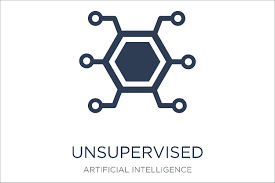